In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# make sure everything was written properly by reading it back out
def read_and_decode_single_example(filenames):
    filename_queue = tf.train.string_input_producer(filenames, num_epochs=1)
    
    reader = tf.TFRecordReader()
    
    _, serialized_example = reader.read(filename_queue)
    # The serialized example is converted back to actual values.
    # One needs to describe the format of the objects to be returned
    features = tf.parse_single_example(
        serialized_example,
        features={
            # We know the length of both fields. If not the
            # tf.VarLenFeature could be used
            'label': tf.FixedLenFeature([], tf.int64),
            'image': tf.FixedLenFeature([], tf.string)
        })
    
    # now return the converted data
    label = features['label']
    image = tf.decode_raw(features['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])
    
    # scale the image
    image = tf.image.per_image_standardization(image)
    
    # random flip image
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    #image = tf.image.random_brightness(image, max_delta=10)
    #image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    
    return label, image

In [5]:
label, image = read_and_decode_single_example(["data/training4_0.tfrecords"])

images_batch, labels_batch = tf.train.batch([image, label], batch_size=16, capacity=2000)

global_step = tf.Variable(0, trainable=False)

# max pool
avg_pool = tf.layers.average_pooling2d(
            images_batch,
            pool_size=(3, 3),  # Pool size: 2x2
            strides=(2, 2),  # Stride: 2
            padding='SAME',
            name='pool1'
        )

max_pool = tf.layers.max_pooling2d(
            images_batch,
            pool_size=(3, 3),  # Pool size: 2x2
            strides=(2, 2),  # Stride: 2
            padding='SAME',
            name='pool2'
        )

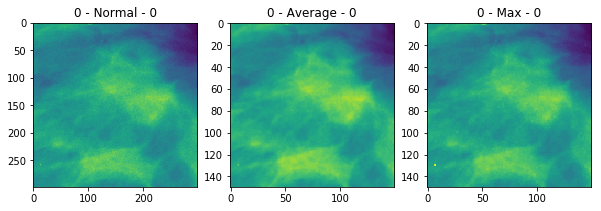

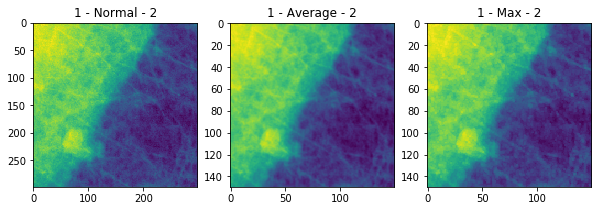

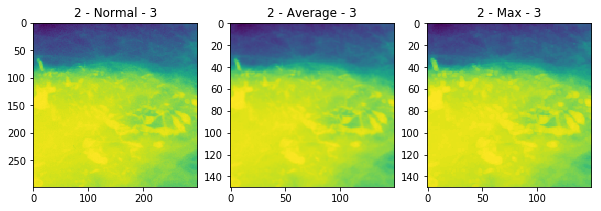

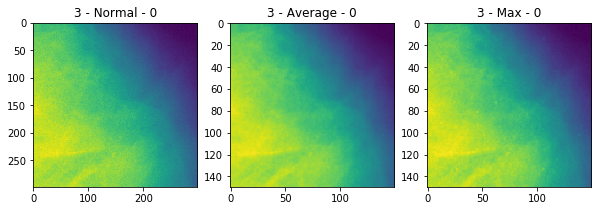

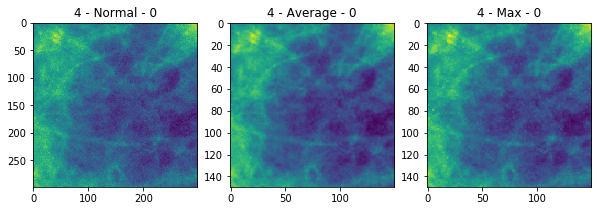

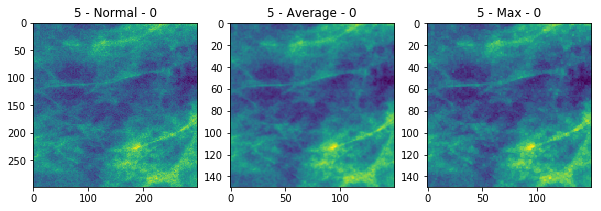

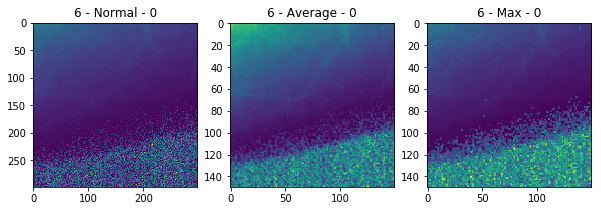

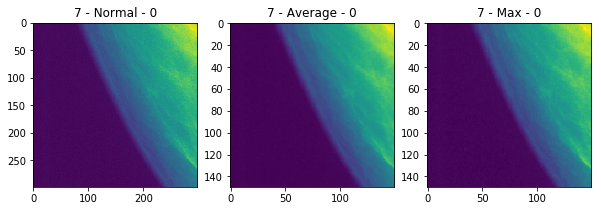

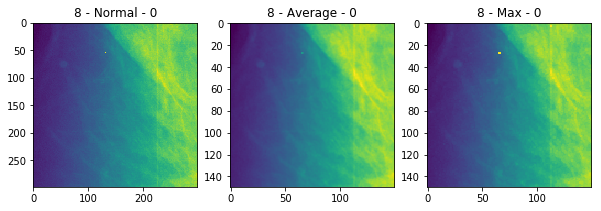

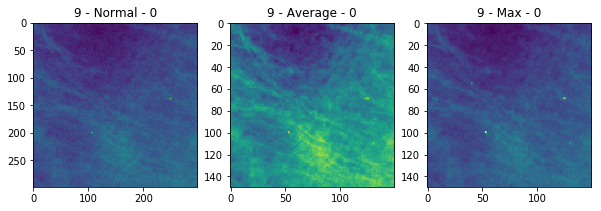

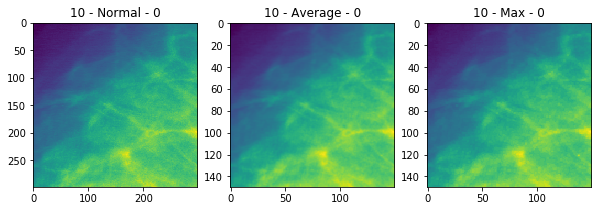

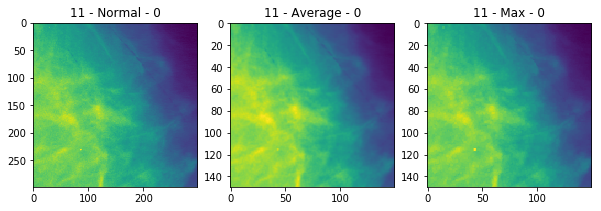

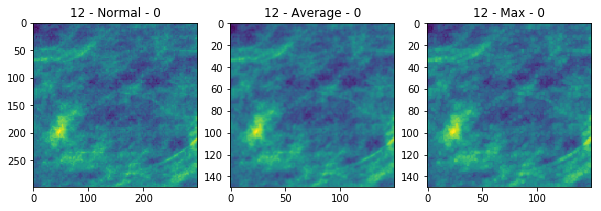

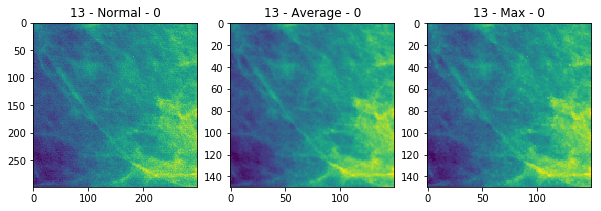

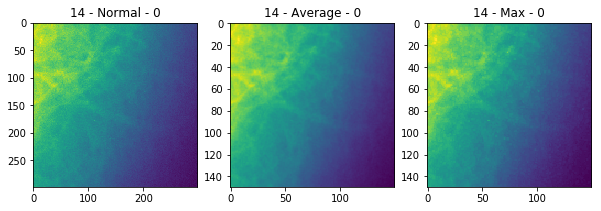

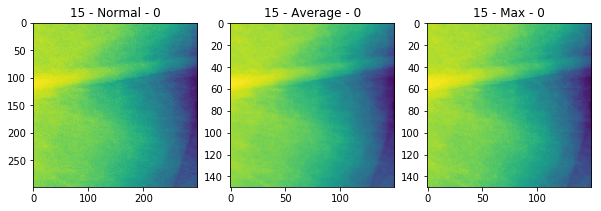

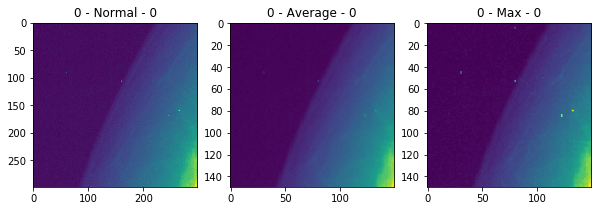

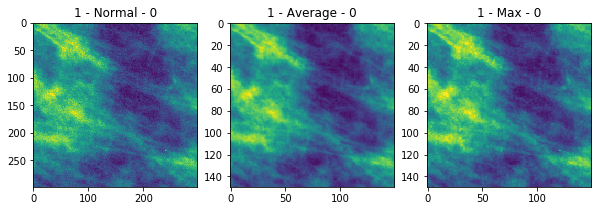

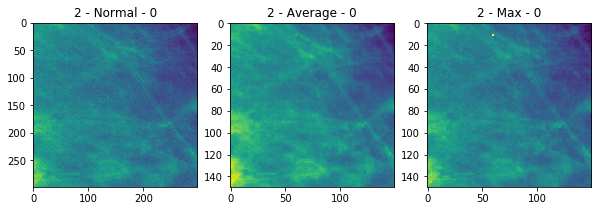

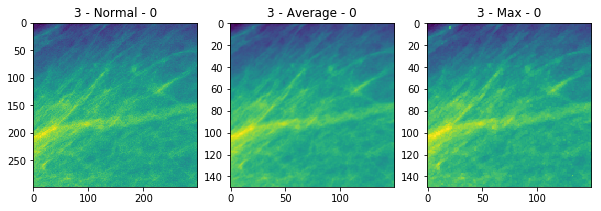

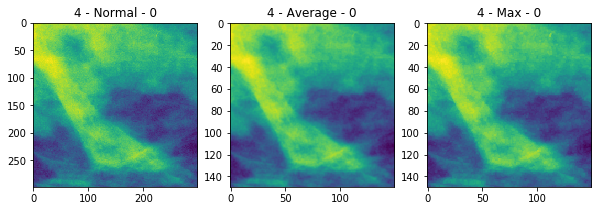

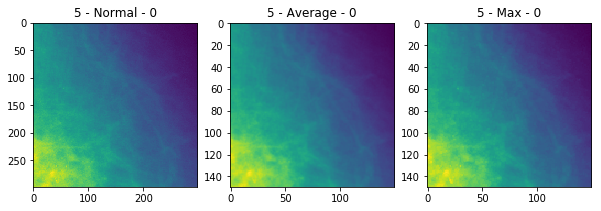

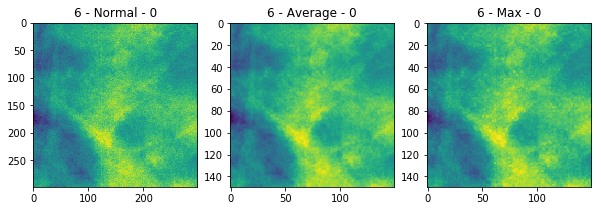

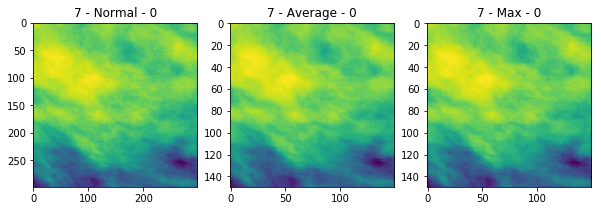

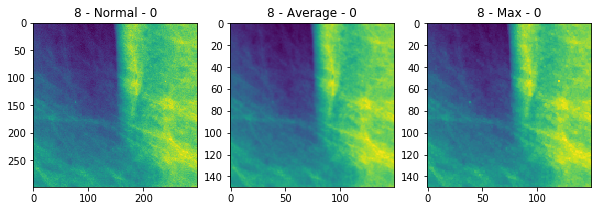

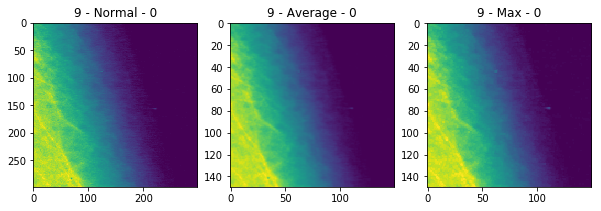

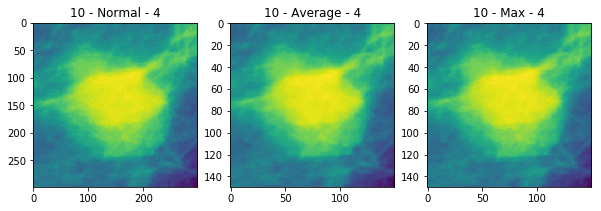

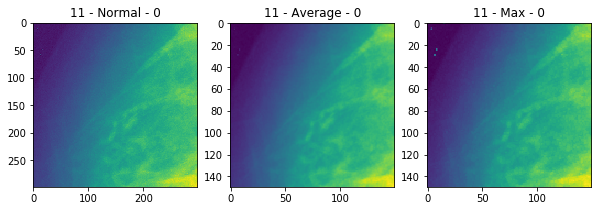

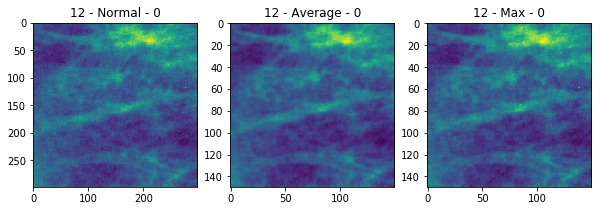

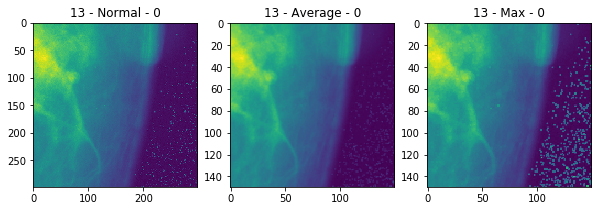

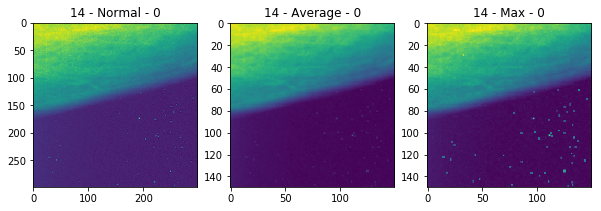

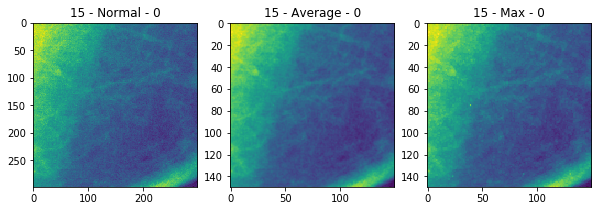

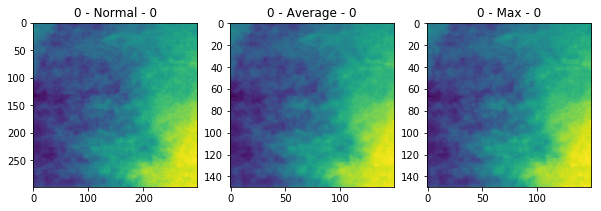

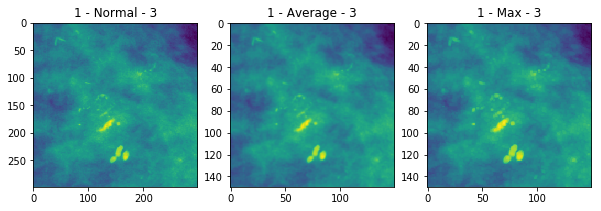

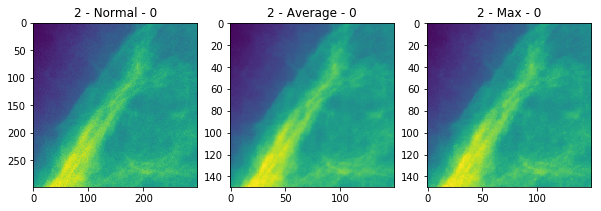

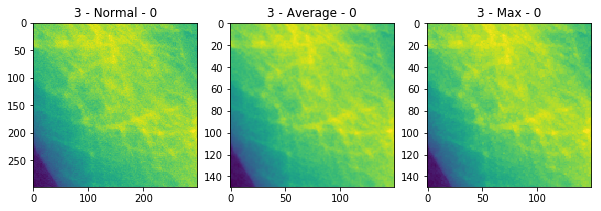

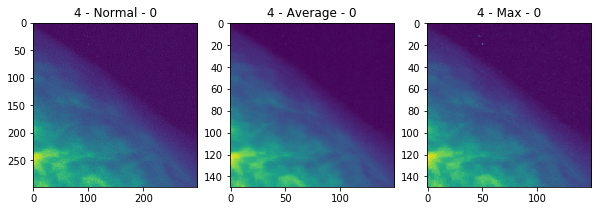

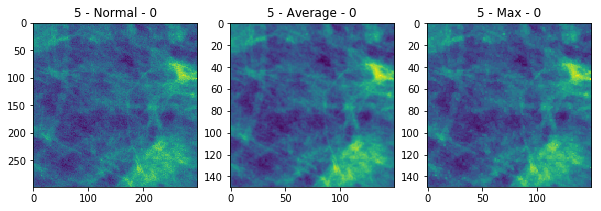

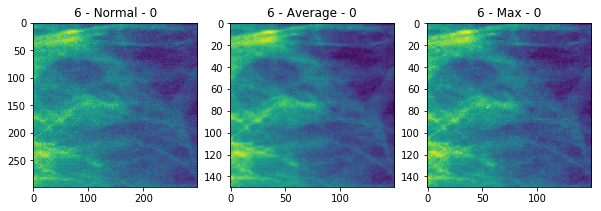

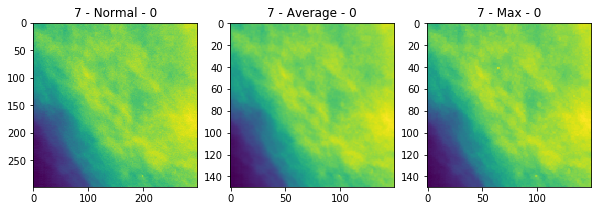

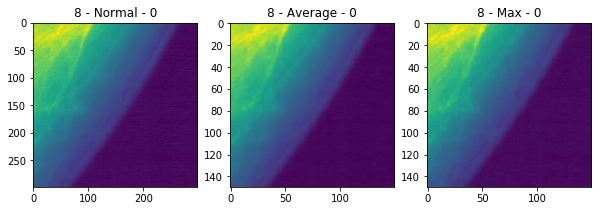

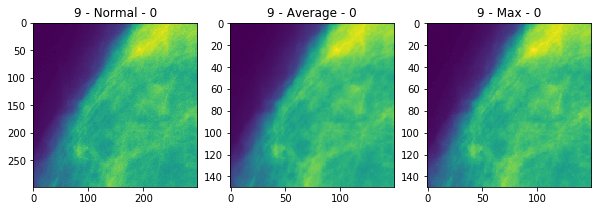

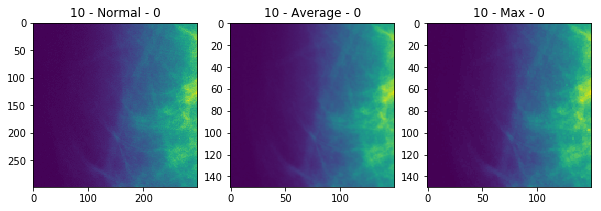

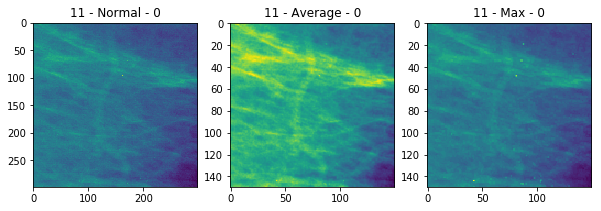

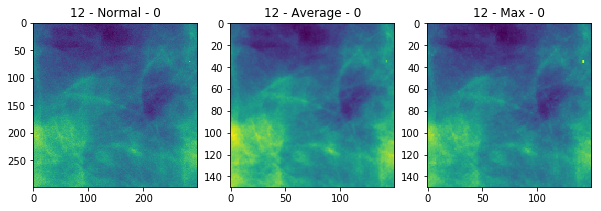

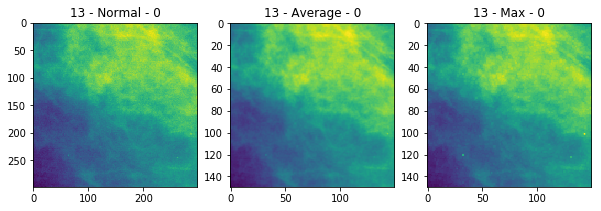

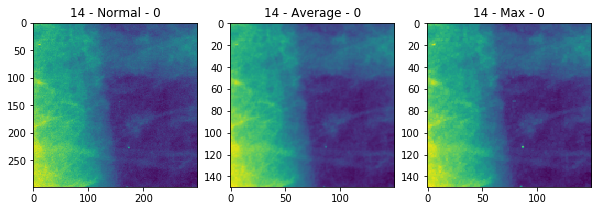

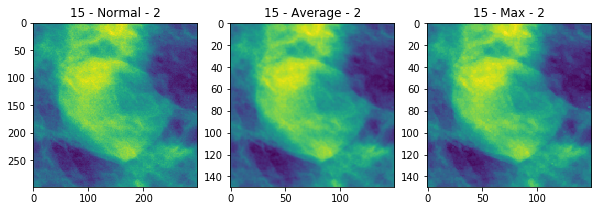

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for j in range(3):
        normal_image, avg_image, max_image, labels = sess.run([images_batch, avg_pool, max_pool, labels_batch])

        for i in range(16):
            f, ax = plt.subplots(1,3,figsize=(10,5))
            ax[0].imshow(normal_image[i].reshape([299,299]))
            ax[0].set_title(str(i) + " - Normal - " + str(labels[i]))
                
            ax[1].imshow(avg_image[i].reshape([150,150]))
            ax[1].set_title(str(i) + " - Average - " + str(labels[i]))
            
            ax[2].imshow(max_image[i].reshape([150,150]))
            ax[2].set_title(str(i) + " - Max - " + str(labels[i]))
            plt.show()
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    

In [7]:
np.mean(normal_image[0])

6.827122e-08

In [8]:
10e-3

0.01